# Example Random Forest application to CRISM data

In [1]:
import pandas as pd
import geopandas as gpd

in_file = '/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/shape_files/Argyre/categorized_olivine_2/T0435.gpkg'
t0435_gpkg = gpd.read_file(in_file)
t0435_gpkg

,Polygon Number,Color,Number of Points,Denominator,Template,Mineral ID 1,Mineral ID 2,Mineral ID 3,Mineral ID 4,wvl,Spectrum Mean,params,Parameters Mean,Best Denom ID,Ratio Spectrum,Category,geometry
0,0,yellow,194,[ ],[ ],plagioclase,,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02846502 0.03741234 0.07884149 0.1407278 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[1.94086120e-01 nan 1.67622030e-01 ...,1,"[1.2726261504036054, 1.2046843544442056, 1.153...",plagioclase (High),"POLYGON ((-60590.421 -2368149.399, -60409.596 ..."
1,1,darkkhaki,194,[ ],[ ],bland,denom,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02236715 0.03105572 0.0683766 0.12213188 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[1.6980837e-01 nan 1.5847304e-01 1.5...,n,nan,Other (High),"POLYGON ((-64026.098 -2337228.307, -64026.098 ..."
2,2,red,59,[ ],[ ],olivine,±hcp,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02233575 0.03144743 0.06911199 0.12398783 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[1.6675130e-01 nan 1.5896216e-01 1.6...,1,"[0.9985961555227199, 1.0126131353579952, 1.010...",hcp + olivine (Moderate),"POLYGON ((-60771.246 -2356757.417, -60771.246 ..."
3,3,darkkhaki,59,[ ],[ ],bland,denom,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02260154 0.03164664 0.06796806 0.12037806 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[1.6530484e-01 nan 1.5921596e-01 1.6...,n,nan,Other (High),"POLYGON ((-60228.771 -2360193.094, -60409.596 ..."
4,4,purple,37,[ ],[ ],olivine,hcp,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.0277822 0.03914795 0.08178724 0.14235847 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[1.64184213e-01 nan 1.59161508e-01 ...,5,"[0.9564271427538651, 1.0123777745193798, 1.005...",hcp + olivine (High),"POLYGON ((-67642.600 -2365979.498, -68004.250 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,461,darkkhaki,7,[ ],[ ],denom,,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02626026 0.03940525 0.0787349 0.1347788 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[1.6216755e-01 nan 1.5561369e-01 1.6...,nan,nan,Other (High),"POLYGON ((-79034.581 -2394730.688, -79396.231 ..."
462,462,orange,15,[ ],[ ],plagioclase,uncertain,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.03884083 0.05062568 0.09466001 0.15458933 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[1.8575478e-01 nan 1.7020702e-01 1.6...,463,[1.0958029 1.0610709 1.0521302 1.0557731 1...,plagioclase (Moderate),"POLYGON ((-62217.847 -2417333.826, -62398.672 ..."
463,463,darkkhaki,15,[ ],[ ],denom,,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.03544509 0.04771187 0.08996987 0.14642286 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[1.7230672e-01 nan 1.4900285e-01 1.6...,nan,nan,Other (High),"POLYGON ((-62037.022 -2419322.902, -62217.847 ..."
464,464,orangered,44,[ ],[X],plagioclase,±olivine,uncertain,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.0513913 0.05166963 0.09642401 0.1638894 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[2.1829350e-01 nan 1.8733266e-01 1.6...,465,[1.0479954 1.0647086 1.0730556 1.08969 1.096...,olivine + plagioclase (Moderate),"POLYGON ((70510.787 -2487398.458, 70702.884 -2..."


In [2]:
# Extract unique parameters
params = t0435_gpkg['params'][0].split()
cnames = ['label'] + params + ['Category'] + ['Color']
# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=cnames)

# Populate the DataFrame with the parameter values for each ROI
for index, row in t0435_gpkg.iterrows():
    cat_name = row['Category']
    color_ = row['Color']
    param_values = [float(x) if x != 'nan' else float('nan') for x in row['Parameters Mean'].replace('[', '').replace(']', '').split()]
    
    result_df.at[index, 'Category'] = cat_name
    result_df.at[index, 'label'] = cat_name
    result_df.at[index, 'Color'] = color_
    for i, param in enumerate(params):
        result_df.at[index, param] = param_values[i]

result_df
# Save the DataFrame to a CSV file
# result_df.to_csv('/Users/phillipsm/Documents/Teaching/AI_in_PlanetaryXXX/Code/00_Introduction/files/t0435_params_by_roi.csv', index=False)

,label,R770,RBR,BD530_2,SH600_2,SH770,BD640_2,BD860_2,BD920_2,RPEAK1,...,CINDEX2,BD2600,IRR2,IRR3,R1080,R1506,R2529,R3920,Category,Color
0,plagioclase (High),0.194086,NaN,0.167622,0.153973,0.021289,NaN,NaN,NaN,0.776734,...,0.034349,0.000255,NaN,NaN,0.181855,0.187953,0.203543,0.149634,plagioclase (High),yellow
1,Other (High),0.169808,NaN,0.158473,0.159918,0.020321,NaN,NaN,NaN,0.755633,...,0.039106,0.001789,0.987383,NaN,0.155619,0.15856,0.160102,0.125547,Other (High),darkkhaki
2,hcp + olivine (Moderate),0.166751,NaN,0.158962,0.160844,0.019616,NaN,NaN,NaN,0.752434,...,0.045604,0.00229,0.98558,NaN,0.152383,0.155084,0.15547,0.121951,hcp + olivine (Moderate),red
3,Other (High),0.165305,NaN,0.159216,0.160959,0.019185,NaN,NaN,NaN,0.751235,...,0.042885,0.002734,0.985072,NaN,0.15085,0.153343,0.153189,0.121042,Other (High),darkkhaki
4,hcp + olivine (High),0.164184,NaN,0.159162,0.161276,0.019068,NaN,NaN,NaN,0.750015,...,0.042789,0.002988,0.98409,NaN,0.149685,0.15207,0.151452,0.119898,hcp + olivine (High),purple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Other (High),0.162168,NaN,0.155614,0.166771,0.023849,NaN,NaN,NaN,0.737784,...,0.061488,0.007505,1.012422,1.207442,0.1458,0.151789,0.152866,0.104446,Other (High),darkkhaki
462,plagioclase (Moderate),0.185755,NaN,0.170207,0.160944,0.027581,NaN,NaN,NaN,0.750272,...,0.031495,0.005902,1.03079,1.238009,0.167697,0.180555,0.19274,0.125872,plagioclase (Moderate),orange
463,Other (High),0.172307,NaN,0.149003,0.165134,0.019473,NaN,NaN,0.003223,0.729306,...,0.024613,0.001421,1.031676,1.120861,0.153176,0.161001,0.164042,0.107197,Other (High),darkkhaki
464,olivine + plagioclase (Moderate),0.218294,NaN,0.187333,0.168456,0.007476,NaN,NaN,NaN,0.836945,...,0.053612,0.001563,1.009056,1.302776,0.206193,0.226925,0.245018,0.180603,olivine + plagioclase (Moderate),orangered


Model Accuracy: 88.89%


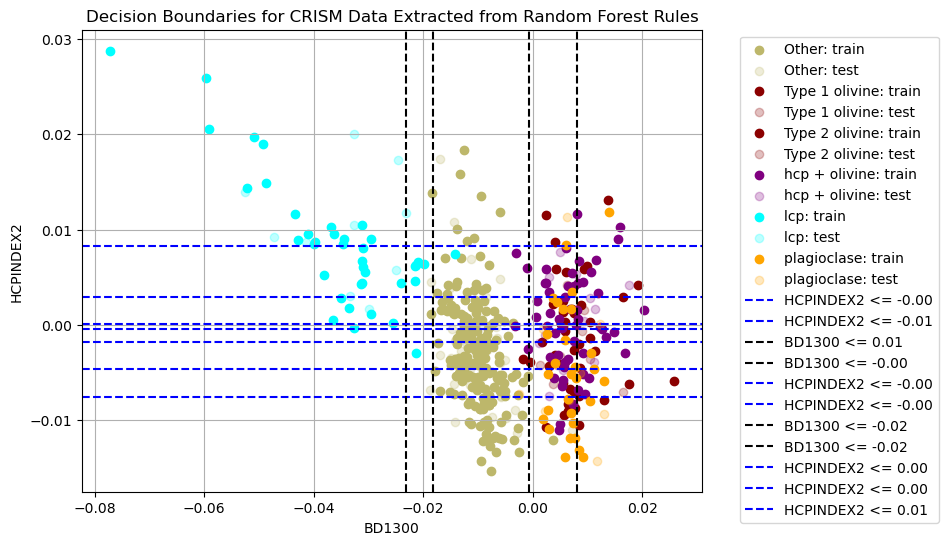

Most Important Rules in the Random Forest:
Node 0: HCPINDEX2 <= -0.00 (Importance: 448.73)
Node 52: OLINDEX3 <= 0.16 (Importance: 203.94)
Node 1: LCPINDEX2 <= 0.01 (Importance: 197.82)
Node 19: BD1300 <= -0.00 (Importance: 136.57)
Node 53: LCPINDEX2 <= 0.03 (Importance: 94.31)
Node 21: RPEAK1 <= 0.77 (Importance: 52.46)
Node 2: OLINDEX3 <= 0.14 (Importance: 38.40)
Node 71: RPEAK1 <= 0.76 (Importance: 37.62)
Node 80: BD920_2 <= -0.00 (Importance: 37.26)
Node 22: HCPINDEX2 <= -0.00 (Importance: 32.06)
Node 81: BD920_2 <= -0.00 (Importance: 27.46)
Node 54: OLINDEX3 <= 0.15 (Importance: 25.68)
Node 82: HCPINDEX2 <= 0.00 (Importance: 22.31)
Node 72: BD860_2 <= -0.02 (Importance: 19.75)
Node 83: BD920_2 <= -0.00 (Importance: 15.66)
Node 6: HCPINDEX2 <= -0.01 (Importance: 15.33)
Node 23: BD920_2 <= -0.00 (Importance: 14.20)
Node 73: BD1300 <= -0.02 (Importance: 13.09)
Node 55: RPEAK1 <= 0.75 (Importance: 11.35)
Node 36: RPEAK1 <= 0.75 (Importance: 10.60)


In [3]:
# libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import _tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
import re

# Load the dataset
csv_path = '/Users/phillipsm/Documents/Teaching/AI_in_PlanetaryXXX/Code/00_Introduction/files/t0435_params_by_roi.csv'
crism_df = pd.read_csv(csv_path)
crism_df.rename(columns={crism_df.columns[0]: 'label'}, inplace=True)

# Function to remove (High), (Moderate), (Low) designations
def simplify_label(label):
    return re.sub(r'\s*\(.*?\)', '', label)

# Apply the function to the 'label' column
crism_df['label'] = crism_df['label'].apply(simplify_label)

# drop na values
# Remove columns with more than half NA values
crism_df = crism_df.loc[:, crism_df.isna().mean() < 0.83]
crism_df = crism_df.fillna(0)

p_to_include = ['BD1300', 'OLINDEX3', 'LCPINDEX2', 'RPEAK1', 'HCPINDEX2', 'BD860_2', 'BD920_2']

# Drop columns not in p_to_include
crism_df = crism_df[p_to_include + ['label', 'Category', 'Color']]

# # normalize each column in crism_df 
# crism_df.iloc[:, :-3] = (crism_df.iloc[:, :-3] - crism_df.iloc[:, :-3].mean()) / crism_df.iloc[:, :-3].std()

# Get the counts of each simplified label
label_counts = crism_df['label'].value_counts()

# Identify labels with counts less than 9
labels_to_keep = label_counts[label_counts >= 9].index

# Filter the DataFrame to keep only the labels with counts >= 9
crism_df = crism_df[crism_df['label'].isin(labels_to_keep)]

# Drop the 'label', 'Category', and 'Color' columns and get the remaining values
X = crism_df.drop(['label', 'Category', 'Color'], axis=1).values

target_names = np.unique(crism_df['label'].values)
feature_names = [col for col in crism_df.columns if col not in ['label', 'Category', 'Color']]

# create a mapping from integer values to label strings
label_mapping = {label: i for i, label in enumerate(target_names)}
y = np.array([label_mapping[label] for label in crism_df['label'].values])

color_mapping = {label: color for label, color in zip(crism_df['label'], crism_df['Color'])}

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(criterion='entropy', random_state=42)

# Train the model (fit the model to the training data)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Function to extract decision rules
def extract_rules(t, feature_names):
    tree_ = t.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = []
    
    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            rules.append((name, threshold, node))
            recurse(tree_.children_left[node])
            recurse(tree_.children_right[node])

    recurse(0)  # Start from the root node
    return rules

# Extract rules from the first tree in the trained random forest
rules = extract_rules(rf_classifier.estimators_[0], feature_names)

# Create a scatter plot for petal length and petal width
plt.figure(figsize=(8, 6))

# Plot the training data points
paramX = 'BD1300'
paramY = 'HCPINDEX2'
i1, i2 = (feature_names.index(paramX), feature_names.index(paramY))
y_index = (0, 1, 2, 3, 4, 5)
for yi in y_index:
    plt.scatter(X_train[y_train == yi, i1], X_train[y_train == yi, i2], color=color_mapping[target_names[yi]], label=f'{target_names[yi]}: train')
    plt.scatter(X_test[y_test == yi, i1], X_test[y_test == yi, i2], color=color_mapping[target_names[yi]], label=f'{target_names[yi]}: test', alpha=0.25)

# Adding decision boundaries based on the rules extracted
for feature, threshold, node in rules:
    if feature_names[i1] in feature:
        plt.axvline(x=threshold, color='black', linestyle='--', label=f'{feature} <= {threshold:.2f}')
    elif feature_names[i2] in feature:
        plt.axhline(y=threshold, color='blue', linestyle='--', label=f'{feature} <= {threshold:.2f}')

# Labels and title
plt.xlabel(feature_names[i1])
plt.ylabel(feature_names[i2])
plt.title('Decision Boundaries for CRISM Data Extracted from Random Forest Rules')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Function to extract and sort decision rules by importance
def extract_and_sort_rules(t, feature_names):
    tree_ = t.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = []
    
    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            importance = tree_.impurity[node] * tree_.n_node_samples[node]
            rules.append((name, threshold, node, importance))
            recurse(tree_.children_left[node])
            recurse(tree_.children_right[node])

    recurse(0)  # Start from the root node
    return sorted(rules, key=lambda x: x[3], reverse=True)

# Extract and sort rules from the first tree in the trained random forest
sorted_rules = extract_and_sort_rules(rf_classifier.estimators_[0], feature_names)

# Print the most important rules
print("Most Important Rules in the Random Forest:")
for feature, threshold, node, importance in sorted_rules[:20]:  # Print top 10 rules
    print(f"Node {node}: {feature} <= {threshold:.2f} (Importance: {importance:.2f})")


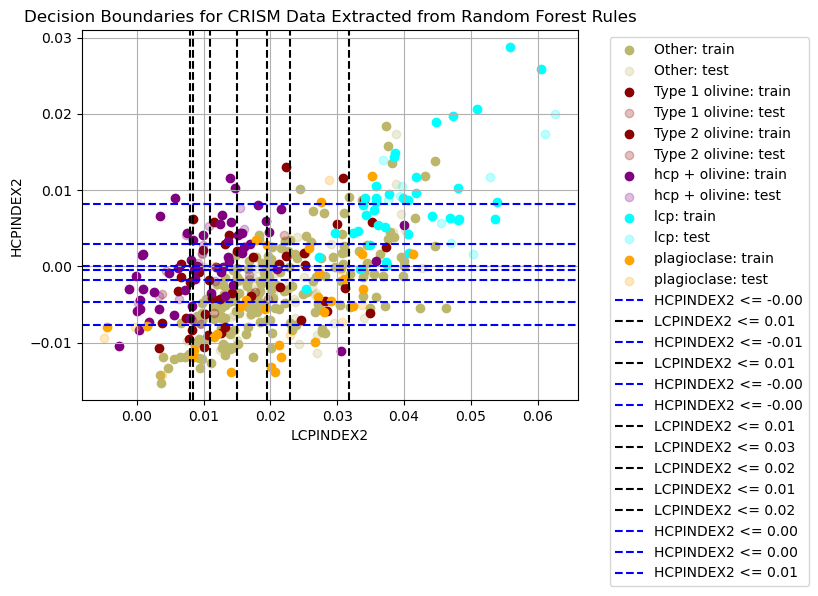

In [5]:
paramX = 'LCPINDEX2'
paramY = 'HCPINDEX2'
i1, i2 = (feature_names.index(paramX), feature_names.index(paramY))
y_index = (0, 1, 2, 3, 4, 5)
for yi in y_index:
    plt.scatter(X_train[y_train == yi, i1], X_train[y_train == yi, i2], color=color_mapping[target_names[yi]], label=f'{target_names[yi]}: train')
    plt.scatter(X_test[y_test == yi, i1], X_test[y_test == yi, i2], color=color_mapping[target_names[yi]], label=f'{target_names[yi]}: test', alpha=0.25)

# Adding decision boundaries based on the rules extracted
for feature, threshold, node in rules:
    if feature_names[i1] in feature:
        plt.axvline(x=threshold, color='black', linestyle='--', label=f'{feature} <= {threshold:.2f}')
    elif feature_names[i2] in feature:
        plt.axhline(y=threshold, color='blue', linestyle='--', label=f'{feature} <= {threshold:.2f}')

# Labels and title
plt.xlabel(feature_names[i1])
plt.ylabel(feature_names[i2])
plt.title('Decision Boundaries for CRISM Data Extracted from Random Forest Rules')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

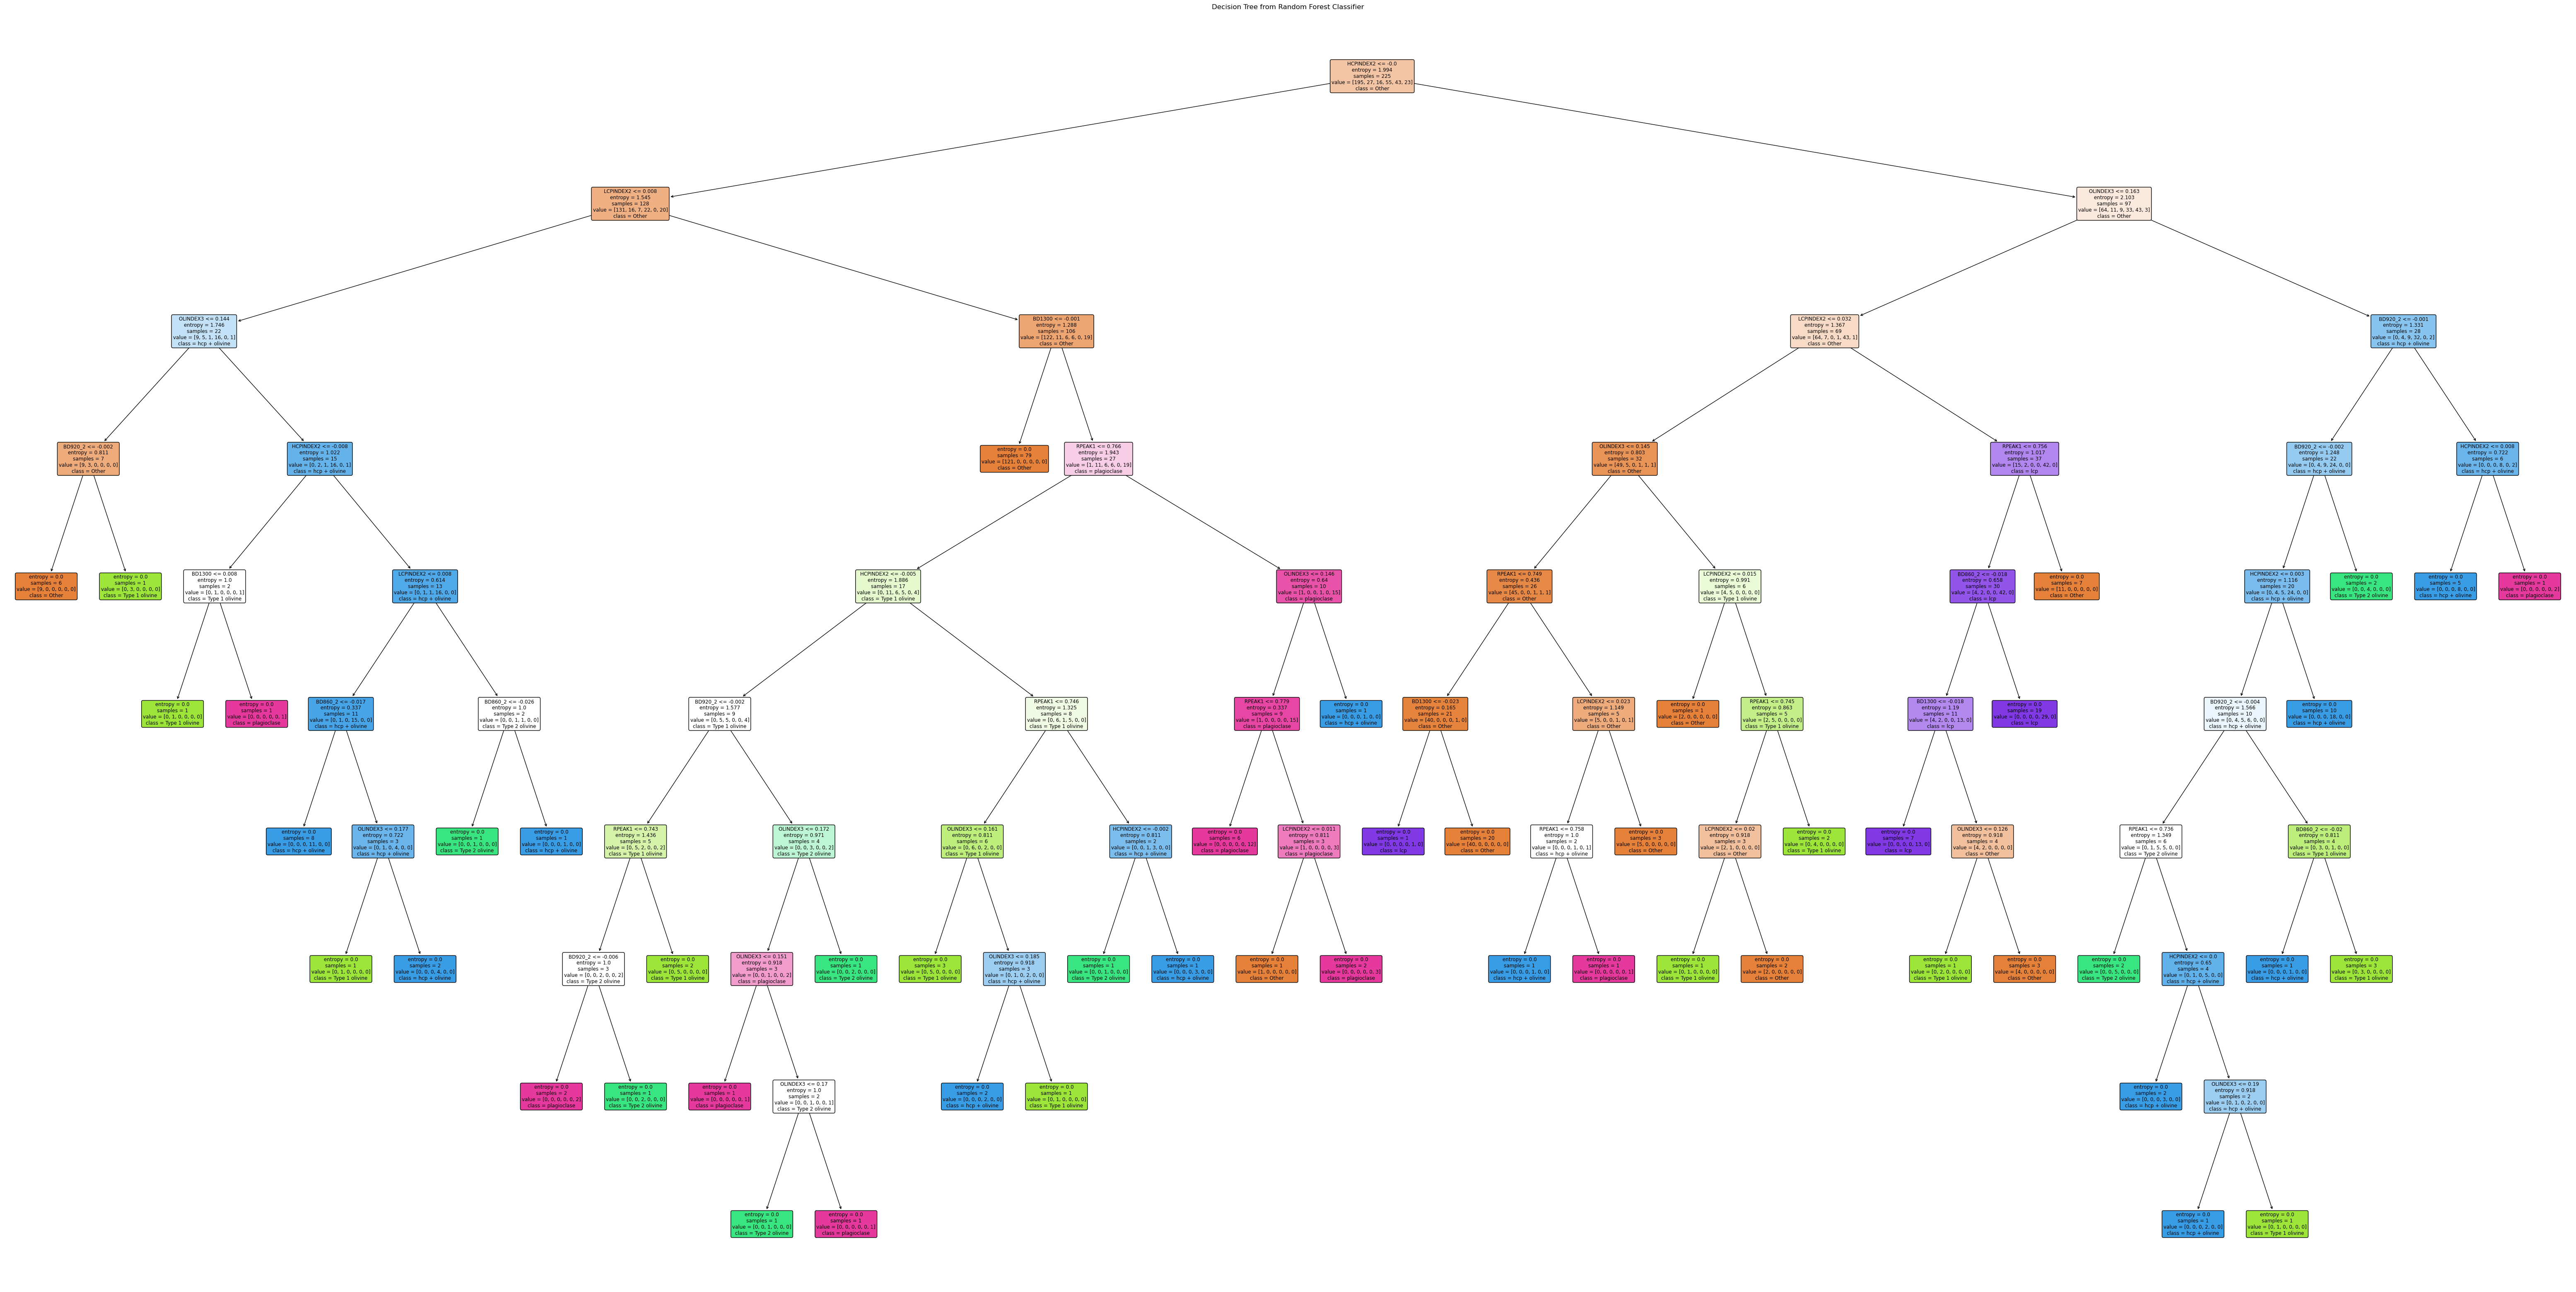

In [6]:
from sklearn.tree import plot_tree

# Plot the first decision tree in the random forest
plt.figure(figsize=(80, 40))
plot_tree(rf_classifier.estimators_[0], feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree from Random Forest Classifier")
plt.show()

In [7]:
import numpy as np
from sklearn.tree import _tree

def extract_and_sort_rules_by_class(tree, feature_names, class_names):
    """
    Extract and sort decision rules from a decision tree by class and importance.
    
    Parameters:
    tree: sklearn.tree.DecisionTreeClassifier
        The trained decision tree classifier
    feature_names: list
        List of feature names
    class_names: list
        List of class names
    
    Returns:
    list of tuples
        Each tuple contains (path_rules, node, importance, class_id, samples, purity)
        where path_rules is a list of (feature, operation, threshold) tuples
    """
    tree_ = tree.tree_
    
    def get_feature_name(index):
        if index != _tree.TREE_UNDEFINED:
            return feature_names[index]
        return "undefined!"

    rules = []
    
    def recurse(node, path_rules=[]):
        # If we're at a leaf node
        if tree_.feature[node] == _tree.TREE_UNDEFINED:
            # Get the dominant class and its probability
            class_distribution = tree_.value[node][0]
            total_samples = np.sum(class_distribution)
            class_id = np.argmax(class_distribution)
            class_samples = class_distribution[class_id]
            
            # Calculate node purity (probability of dominant class)
            purity = class_samples / total_samples if total_samples > 0 else 0
            
            # Calculate importance using multiple factors
            # - node_samples: weight by number of samples reaching this node
            # - purity: weight by how pure the node is
            # - depth_factor: give some weight to shorter rules
            node_samples = tree_.n_node_samples[node]
            depth_factor = 1.0 / (len(path_rules) + 1)  # Shorter paths get higher weight
            importance = node_samples * purity * depth_factor
            
            # Save the path rules that led to this leaf
            rules.append((path_rules, node, importance, class_id, node_samples, purity))
            return
            
        # Get the feature and threshold for this node
        feature = get_feature_name(tree_.feature[node])
        threshold = tree_.threshold[node]
        
        # Recurse left
        left_rules = path_rules + [(feature, "<=", threshold)]
        recurse(tree_.children_left[node], left_rules)
        
        # Recurse right
        right_rules = path_rules + [(feature, ">", threshold)]
        recurse(tree_.children_right[node], right_rules)
    
    # Start recursion from root
    recurse(0)
    
    # Sort rules by importance
    return sorted(rules, key=lambda x: x[2], reverse=True)

def print_rules_by_class(sorted_rules, class_names, top_n=10):
    """
    Print the most important rules for each class.
    
    Parameters:
    sorted_rules: list
        Output from extract_and_sort_rules_by_class
    class_names: list
        List of class names
    top_n: int
        Number of top rules to print per class
    """
    print("Most Important Rules by Class:")
    
    for class_id, class_name in enumerate(class_names):
        print(f"\nClass: {class_name}")
        class_rules = [rule for rule in sorted_rules if rule[3] == class_id]
        
        for path_rules, node, importance, _, samples, purity in class_rules[:top_n]:
            print(f"\nRule for Node {node}:")
            print(f"Samples: {samples}, Purity: {purity:.2%}, Importance: {importance:.4f}")
            for feature, operation, threshold in path_rules:
                print(f"  {feature} {operation} {threshold:.4f} AND")

# Example usage:

# Assuming you have a trained random forest classifier named rf_classifier
rules = extract_and_sort_rules_by_class(
    rf_classifier.estimators_[0],  # Get first tree
    feature_names,
    target_names
)
print_rules_by_class(rules, target_names)


Most Important Rules by Class:

Class: Other

Rule for Node 20:
Samples: 79, Purity: 100.00%, Importance: 19.7500
  HCPINDEX2 <= -0.0004 AND
  LCPINDEX2 > 0.0084 AND
  BD1300 <= -0.0007 AND

Rule for Node 58:
Samples: 20, Purity: 100.00%, Importance: 2.8571
  HCPINDEX2 > -0.0004 AND
  OLINDEX3 <= 0.1628 AND
  LCPINDEX2 <= 0.0317 AND
  OLINDEX3 <= 0.1454 AND
  RPEAK1 <= 0.7487 AND
  BD1300 > -0.0231 AND

Rule for Node 79:
Samples: 7, Purity: 100.00%, Importance: 1.4000
  HCPINDEX2 > -0.0004 AND
  OLINDEX3 <= 0.1628 AND
  LCPINDEX2 > 0.0317 AND
  RPEAK1 > 0.7561 AND

Rule for Node 4:
Samples: 6, Purity: 100.00%, Importance: 1.2000
  HCPINDEX2 <= -0.0004 AND
  LCPINDEX2 <= 0.0084 AND
  OLINDEX3 <= 0.1438 AND
  BD920_2 <= -0.0023 AND

Rule for Node 63:
Samples: 3, Purity: 100.00%, Importance: 0.4286
  HCPINDEX2 > -0.0004 AND
  OLINDEX3 <= 0.1628 AND
  LCPINDEX2 <= 0.0317 AND
  OLINDEX3 <= 0.1454 AND
  RPEAK1 > 0.7487 AND
  LCPINDEX2 > 0.0229 AND

Rule for Node 77:
Samples: 3, Purity: 100.0